In [1]:
import lasio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading data

In [2]:
las = lasio.read("well 1.las")
data = las.df()
data

,AK,BK,BK_3,DS,DS_2,DT_1,GGP,GGP_1,GK,GK_3,NNB,NNB_1,PS,PS_3
DEPT,,,,,,,,,,,,,,
3650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.409
3650.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.669
3650.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.159
3650.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.266
3650.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231.6,NaN,19.58,NaN,197.33,NaN,NaN,NaN,NaN,6.630,NaN,9.580,NaN,207.652,NaN
4231.7,NaN,18.74,NaN,197.52,NaN,NaN,NaN,NaN,6.932,NaN,9.451,NaN,207.554,NaN
4231.8,NaN,18.79,NaN,197.64,NaN,NaN,NaN,NaN,7.059,NaN,9.240,NaN,207.476,NaN


# Logs visualisation

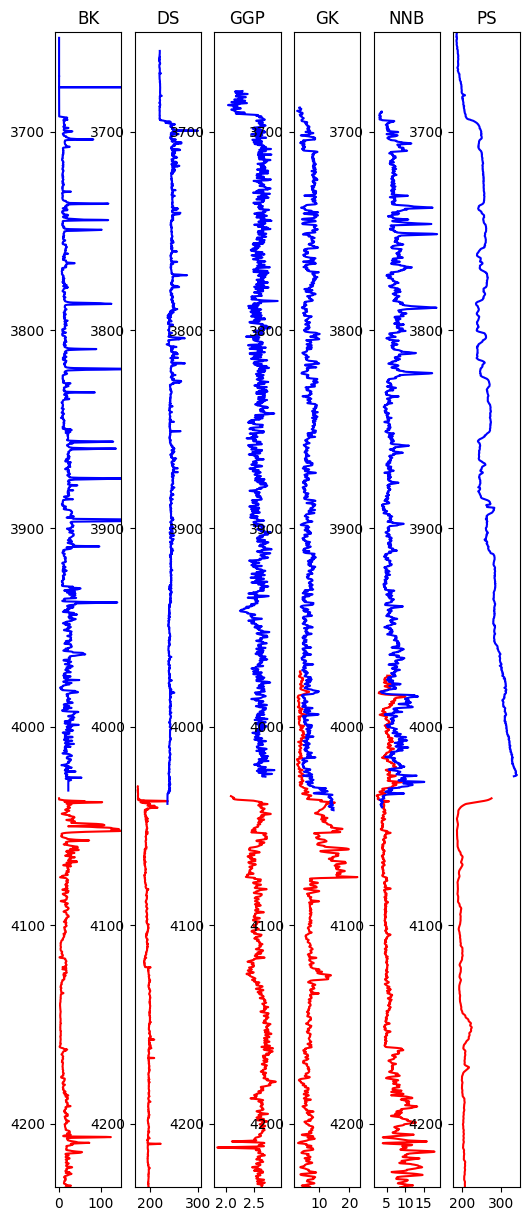

In [ ]:
fig, axs = plt.subplots(1, 6)
fig.set_size_inches(6,15)
axs[0].plot(data.BK, data.index, c="red")
axs[0].plot(data.BK_3, data.index, c="blue")
axs[0].set_title("BK")
axs[0].set_xlim((-10, 150))

axs[1].plot(data.DS, data.index, c="red")
axs[1].plot(data.DS_2, data.index, c="blue")
axs[1].set_title("DS")

axs[2].plot(data.GGP, data.index, c="red")
axs[2].plot(data.GGP_1, data.index, c="blue")
axs[2].set_title("GGP")

axs[3].plot(data.GK, data.index, c="red")
axs[3].plot(data.GK_3, data.index, c="blue")
axs[3].set_title("GK")

axs[4].plot(data.NNB, data.index, c="red")
axs[4].plot(data.NNB_1, data.index, c="blue")
axs[4].set_title("NNB")

axs[5].plot(data.PS, data.index, c="red")
axs[5].plot(data.PS_3, data.index, c="blue")
axs[5].set_title("PS")

for ax in axs:
    ax.set_ylim((4232., 3650.))

In [4]:
#Cutting false data on ends of GGP and PS
ggp_first_index = data['GGP'].dropna().index[0]
data.loc[ggp_first_index:ggp_first_index+2.2, 'GGP'] = pd.NA

ps_first_index = data['PS'].dropna().index[0]
data.loc[ps_first_index:ps_first_index+3, 'PS'] = pd.NA

#BK, DS, GGP, PS
data['BK_F'] = data.loc[:,['BK','BK_3']].sum(axis=1, min_count=1)
data['DS_F'] = data['DS_2'].fillna(data['DS'])
data['GGP_F'] = data['GGP_1'].fillna(data['GGP'])
data['PS_F'] = data['PS_3'].fillna(data['PS'])
#GK
mask = data['GK'].notna() & data['GK_3'].notna()
data['GK'] -= (data.loc[mask,"GK"] - data.loc[mask,"GK_3"]).mean()
data['GK_F'] = data['GK_3'].combine_first(data['GK'])
#NNB
mask = data['NNB'].notna() & data['NNB_1'].notna()
data['NNB'] -= (data.loc[mask,"NNB"] - data.loc[mask,"NNB_1"]).mean()
data['NNB_F'] = data['NNB'].combine_first(data['NNB_1'])

# Sewed logs visualisation

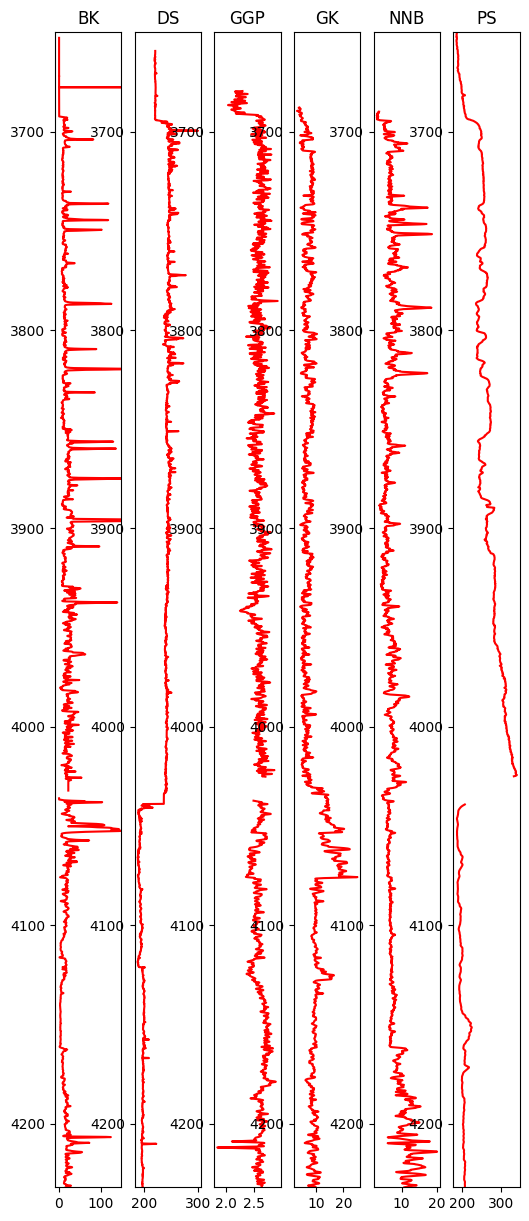

In [ ]:
fig, axs = plt.subplots(1, 6)
fig.set_size_inches(6,15)
axs[0].plot(data.BK_F, data.index, c="red")
axs[0].set_title("BK")
axs[0].set_xlim((-10, 150))

axs[1].plot(data.DS_F, data.index, c="red")
axs[1].set_title("DS")

axs[2].plot(data.GGP_F, data.index, c="red")
axs[2].set_title("GGP")

axs[3].plot(data.GK_F, data.index, c="red")
axs[3].set_title("GK")

axs[4].plot(data.NNB_F, data.index, c="red")
axs[4].set_title("NNB")

axs[5].plot(data.PS_F, data.index, c="red")
axs[5].set_title("PS")
for ax in axs:
    ax.set_ylim((4232., 3650.))

# Log linking (увязка)

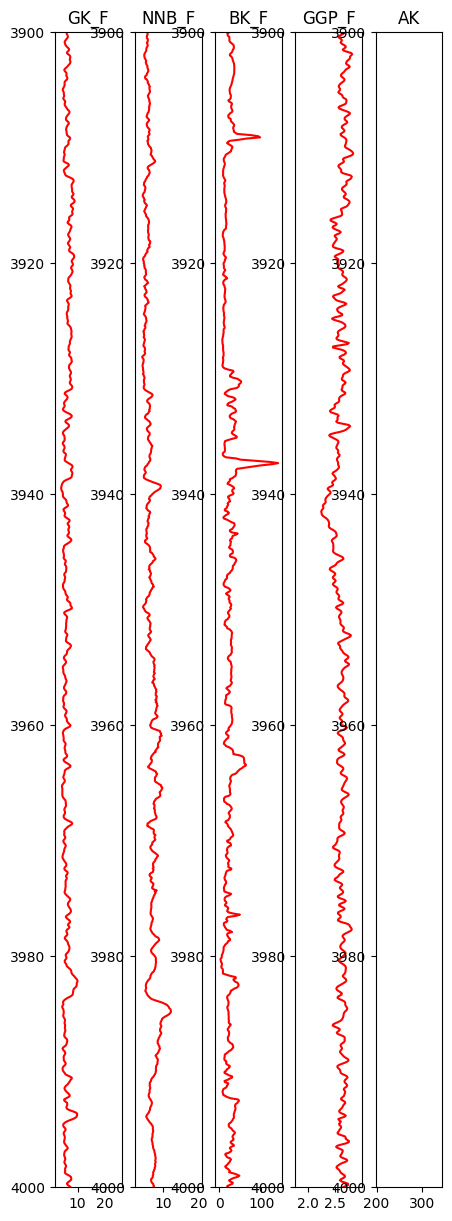

In [20]:
range = {"full":(4232., 3650.), "AK": (4232., 4010.), "GK_NNB": (4000., 3900.)}
fig, axs = plt.subplots(1, 5)
fig.set_size_inches(5,15)
axs[0].plot(data.GK_F, data.index, c="red")
axs[0].set_title("GK_F")

axs[1].plot(data.NNB_F, data.index, c="red")
axs[1].set_title("NNB_F")

axs[2].plot(data.BK_F, data.index, c="red")
axs[2].set_title("BK_F")
axs[2].set_xlim((-10, 150))

axs[3].plot(data.GGP_F, data.index, c="red")
axs[3].set_title("GGP_F")

axs[4].plot(data.AK, data.index, c="red")
axs[4].set_title("AK")
for ax in axs:
    ax.set_ylim(range["GK_NNB"])